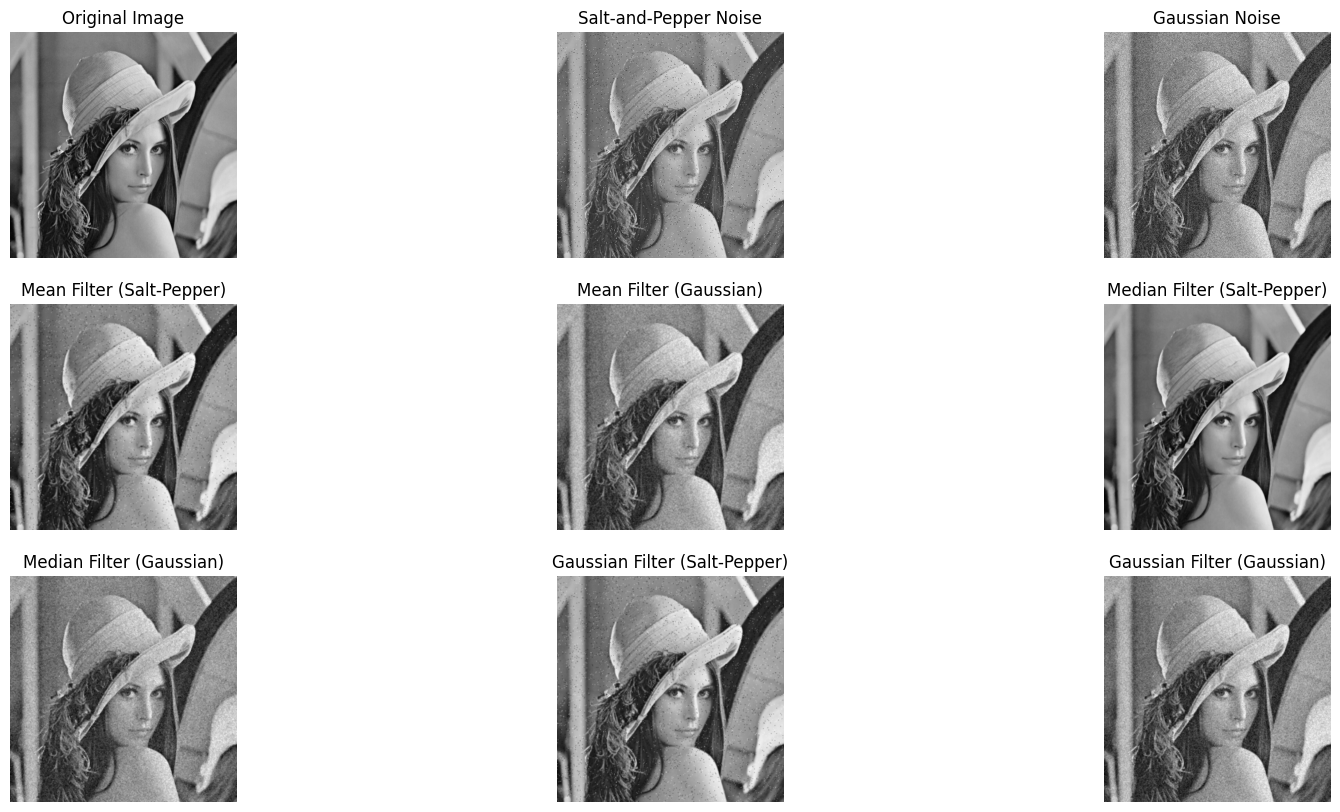

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_mean_filter(image, kernel_size=3):
    return cv2.blur(image, (kernel_size, kernel_size))

def apply_median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

def apply_gaussian_filter(image, kernel_size=3, sigma=1):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

def add_salt_and_pepper_noise(image, amount=0.02):
    noisy_image = image.copy()
    total_pixels = noisy_image.size
    num_salt = int(total_pixels * amount / 2)
    num_pepper = int(total_pixels * amount / 2)

    salt_coords = [np.random.randint(0, i-1, num_salt) for i in noisy_image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in noisy_image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

def add_gaussian_noise(image, mean=0, sigma=25):
    row, col = image.shape
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = np.add(image, gauss)
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

image_path = '/content/Lenna_(test_image).png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

salt_pepper_image = add_salt_and_pepper_noise(image)
gaussian_image = add_gaussian_noise(image)

mean_filtered_salt_pepper = apply_mean_filter(salt_pepper_image)
median_filtered_salt_pepper = apply_median_filter(salt_pepper_image)
gaussian_filtered_salt_pepper = apply_gaussian_filter(salt_pepper_image)

mean_filtered_gaussian = apply_mean_filter(gaussian_image)
median_filtered_gaussian = apply_median_filter(gaussian_image)
gaussian_filtered_gaussian = apply_gaussian_filter(gaussian_image)

plt.figure(figsize=(20, 10))

plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(salt_pepper_image, cmap='gray')
plt.title('Salt-and-Pepper Noise')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(gaussian_image, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(mean_filtered_salt_pepper, cmap='gray')
plt.title('Mean Filter (Salt-Pepper)')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(mean_filtered_gaussian, cmap='gray')
plt.title('Mean Filter (Gaussian)')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(median_filtered_salt_pepper, cmap='gray')
plt.title('Median Filter (Salt-Pepper)')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(median_filtered_gaussian, cmap='gray')
plt.title('Median Filter (Gaussian)')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(gaussian_filtered_salt_pepper, cmap='gray')
plt.title('Gaussian Filter (Salt-Pepper)')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(gaussian_filtered_gaussian, cmap='gray')
plt.title('Gaussian Filter (Gaussian)')
plt.axis('off')

plt.show()


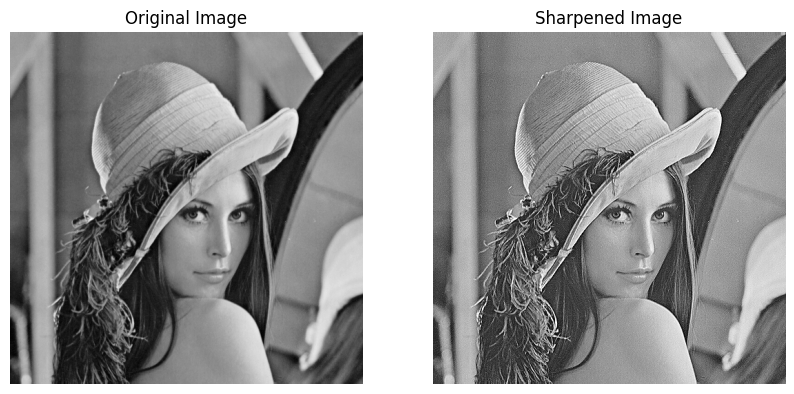

In [7]:
def apply_sharpening_filter(image):
    kernel = np.array([[ 0, -1,  0],
                       [-1,  5, -1],
                       [ 0, -1,  0]], dtype=np.float32)
    return cv2.filter2D(image, -1, kernel)

sharpened_image = apply_sharpening_filter(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.show()

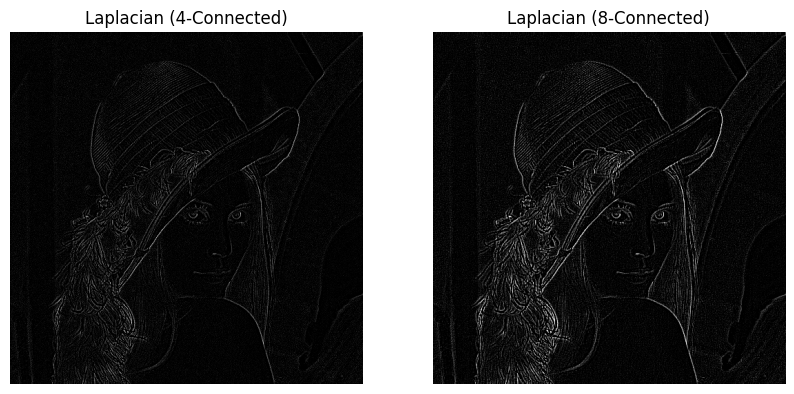

In [8]:
def laplacian_4_connected(image):
    kernel = np.array([[ 0,  1,  0],
                       [ 1, -4,  1],
                       [ 0,  1,  0]], dtype=np.float32)
    return cv2.filter2D(image, -1, kernel)

def laplacian_8_connected(image):
    kernel = np.array([[ 1,  1,  1],
                       [ 1, -8,  1],
                       [ 1,  1,  1]], dtype=np.float32)
    return cv2.filter2D(image, -1, kernel)

laplacian_4_image = laplacian_4_connected(image)
laplacian_8_image = laplacian_8_connected(image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(laplacian_4_image, cmap='gray')
plt.title('Laplacian (4-Connected)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_8_image, cmap='gray')
plt.title('Laplacian (8-Connected)')
plt.axis('off')

plt.show()